In [1]:
import cv2
import sys
import os
from matplotlib import pyplot as plt
import numpy as np

## Play Video

In [2]:
path_to_vid = "E:/Documents/University/2018 Semester 2/COMP3419 Graphics and Multimedia/Labs/blue ball.mov"
vid_cap = cv2.VideoCapture(path_to_vid)
if vid_cap.isOpened() == False:
    print("Error capturing video.")
    sys.exit(1)
frame_count = int(vid_cap.get(cv2.CAP_PROP_FRAME_COUNT))
frame_height = 360
frame_width = 640
print(frame_count, frame_height, frame_width)

300 360 640


In [3]:
frames = []
while(True):
    has_more, frame = vid_cap.read() 
    if has_more == False: 
        print("No more frames in video file.")
        break
    resize = cv2.resize(frame, (640, 360)) 
    cv2.imshow("ball", resize)
    frames.append(resize)
    if cv2.waitKey(20) & 0xff == ord('q'):
        break
vid_cap.release()
cv2.destroyAllWindows()

No more frames in video file.


## Motion Estimation Implementation

In [4]:
K = 9
radius = 1
threshold = 25
block_height = int(np.ceil(frame_height/K))
block_width = int(np.ceil(frame_width/K))
print(block_height, block_width)
block_x, block_y = 0, 0
displacement_vectors = np.empty((frame_count, block_height, block_width, 2))
displacement_vectors.shape

40 72


(300, 40, 72, 2)

In [5]:
def calculate_SSD(anchor_B, target_B):
    '''Return sum of squared displacement.'''
    SSD = 0
    if anchor_B.shape != target_B.shape: 
        print(anchor_B.shape, target_B.shape)
    for i in range(0, anchor_B.shape[0]): 
        for j in range(0, anchor_B.shape[1]):
            anchor_red = anchor_B[i][j][0]
            anchor_green = anchor_B[i][j][1]
            anchor_blue = anchor_B[i][j][2]
            target_red = target_B[i][j][0]
            target_green = target_B[i][j][1]
            target_blue = target_B[i][j][2]
            diff = (anchor_red - target_red)^2 + (anchor_green - target_green)^2 + (anchor_blue - target_blue)^2
            SSD = SSD + diff
    return np.sqrt(SSD)

In [6]:
def draw_dot(frame, x1, y1): 
    '''Draw a dot in centre of the block.'''
    centre = (y1, x1)
    frame = cv2.circle(frame, centre, 1 , (0,255,0), -1)
    return frame 

In [7]:
frames_with_arrows = []
def draw_arrow(frame, x1, y1, x2, y2): 
    '''Draw arrows over the frame for motion visualisation.'''
    pt1 = (y1, x1)
    pt2 = (y2, x2)
    frame = cv2.arrowedLine(frame, pt1, pt2, (0,255,0), 1)
    return frame 

In [8]:
frame_counter = 0
frame_save_path = "E:/Documents/University/2018 Semester 2/COMP3419 Graphics and Multimedia/Labs/Frames2/"

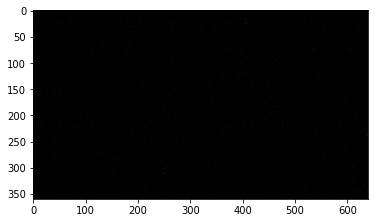

In [14]:
black_image = cv2.imread('black.jpg')
black_image = cv2.resize(black_image, (640, 360))
plt.imshow(black_image)

In [15]:
for i in range(4, frame_count-1): #start from 4th frame where motion occurs 
    anchor_frame = frames[i]
    target_frame = frames[i+1]
    black_frame = black_image.copy() 
    for x in range(0, frame_height-K, K): #for every block in every frame; rows
        for y in range(0, frame_width-K, K): #columns 
            SSD_MIN = np.inf
            disp_x, disp_y, min_ssd_x, min_ssd_y = 0, 0, 0, 0 
            anchor_frame_block = anchor_frame[x:x+K,y:y+K] #get block of anchor frame 
            for x_iter in range(x-radius*K, x+radius*K, K): #search around radius anchor frame in target frame,
                if x_iter < 0: x_iter = 0
                if x_iter > frame_height: x_iter = frame_height - 1
                for y_iter in range(y-radius*K, y+radius*K, K):
                    if y_iter < 0: y_iter = 0 
                    if y_iter > frame_width: y_iter = frame_width - 1
                    if x_iter == x and y_iter == y: continue 
                    target_frame_block = target_frame[x_iter:x_iter+K,y_iter:y_iter+K]
                    SSD = calculate_SSD(anchor_frame_block, target_frame_block)
                    if SSD < SSD_MIN:
                        SSD_MIN = SSD 
                        min_ssd_x = int(x_iter + ((K-1)/2));
                        min_ssd_y = int(y_iter + ((K-1)/2));
                        disp_x = x_iter - x
                        disp_y = y_iter - y
            displacement_vectors[i][block_x][block_y][0] = disp_x 
            displacement_vectors[i][block_x][block_y][1] = disp_y
            #print(SSD_MIN)
            if SSD_MIN > threshold and SSD_MIN != np.inf and anchor_frame_block.shape == target_frame_block.shape: 
                #anchor_frame = draw_dot(anchor_frame, min_ssd_x, min_ssd_y, int(x + ((K-1)/2)), int(y + ((K-1)/2)))
                new_frame = draw_dot(black_frame, int(x + ((K-1)/2)), int(y + ((K-1)/2)))
            block_y += 1
            if block_y == block_width: block_y = 0
        block_x += 1
        if block_x == block_height: block_x = 0
    frames_with_arrows.append(new_frame)
    cv2.imwrite(frame_save_path + 'frame%d.tif' % frame_counter, new_frame)
    frame_counter += 1

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: overflow encountered in ubyte_scalars
  


## Output Video with Drawn Arrows or Dots

In [206]:
frame_load_path = frame_save_path
path_to_output_video = "E:/Documents/University/2018 Semester 2/COMP3419 Graphics and Multimedia/Labs/Labs/monkey.mov"

In [207]:
out = cv2.VideoWriter(path_to_output_video, cv2.VideoWriter_fourcc('M', 'J', 'P', 'G'), 10, (int(frame_width), int(frame_height)))
frame_counter = 0
while(1):
    img = cv2.imread(frame_load_path + 'frame%d.tif' % frame_counter)
    if img is None:
        print('No more frames to be loaded')
        break;
    out.write(img)
    frame_counter += 1
out.release()
cv2.destroyAllWindows()

No more frames to be loaded
